## Setup

In [1]:
from collections import OrderedDict
from enum import Enum

In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torch
import numpy as np

In [3]:
from curlyBrace import curlyBrace

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
# Formatting & autoreload stuff
%load_ext lab_black
%load_ext autoreload
%autoreload 2
# %matplotlib ipympl

## Weights heatmap

In [7]:
loc_rand = torch.randn((34, 34)) * 0.2
loc_rand.shape

torch.Size([34, 34])

In [8]:
# loc_rand2 = torch.randn((34, 34)) * 0.2
# loc_rand2.shape

In [9]:
blocs = torch.block_diag(
    torch.ones((4, 4)),
    torch.ones((6, 6)),
    torch.ones((4, 4)),
    torch.ones((6, 6)),
    torch.ones((5, 5)),
    torch.ones((2, 2)),
    torch.ones((7, 7)),
)
blocs.shape

torch.Size([34, 34])

In [10]:
# blocs2 = torch.block_diag(
#     torch.ones((6, 6)),
#     torch.ones((4, 4)),
#     torch.ones((5, 5)),
#     torch.ones((3, 3)),
#     torch.ones((7, 7)),
# )
# blocs2.shape

In [11]:
loc = blocs + loc_rand

In [12]:
# loc2 = blocs2 + loc_rand2

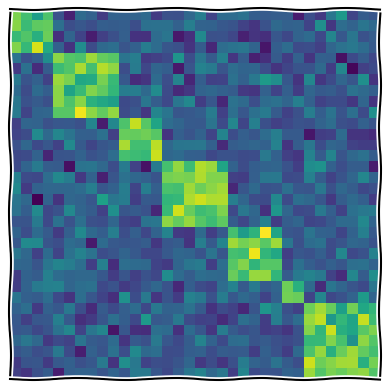

In [13]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.matshow(loc)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [14]:
odor_diag = torch.zeros(3, 3)
odor_diag.fill_diagonal_(1)
odor_diag

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [15]:
# odor_rand = torch.randn((3, 3)) * 0.2
odor_rand = torch.zeros((3, 3))
odor_rand

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [16]:
odor = odor_diag + odor_rand
odor

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

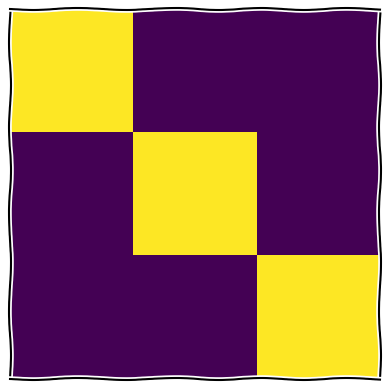

In [17]:
with plt.xkcd():
    fig, ax = plt.subplots()
    ax.matshow(odor)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [18]:
odor_loc = torch.randn((34, 3))
odor_loc.T

tensor([[-2.3433e+00,  1.1490e+00,  3.6815e-01, -5.3713e-01, -1.2432e+00,
         -3.5026e-01,  1.0615e+00, -7.4336e-02,  6.1866e-01, -1.0889e-01,
          1.0762e+00, -2.5878e-01,  1.4451e+00, -1.0504e-01, -5.6865e-01,
         -6.9515e-01,  9.4494e-01,  7.0447e-01,  1.0330e+00, -3.3208e-01,
         -1.1587e+00, -1.2446e+00,  7.4286e-01, -2.1572e-01,  1.9539e+00,
          1.8016e-01, -9.6717e-01,  1.6185e-01,  1.3866e+00, -1.1580e-03,
          7.1855e-01,  8.1821e-01,  5.5005e-01,  1.0614e-01],
        [ 4.5737e-01,  4.8317e-01,  1.2938e+00, -2.7570e-02, -9.5199e-01,
          1.9519e+00,  7.3813e-01,  4.8485e-01, -7.7055e-01, -1.0174e+00,
         -6.2082e-01,  4.5926e-03,  4.2993e-01,  7.2117e-01,  1.3282e-01,
          1.2585e+00, -8.1246e-01,  1.5845e+00, -1.0575e+00, -9.3311e-01,
          4.5247e-01, -1.1604e+00, -5.3480e-02, -7.3943e-01, -5.2322e-01,
          5.4803e-01,  5.9663e-01, -5.7711e-01, -2.1533e-01, -1.0759e-01,
         -7.5451e-01, -2.5116e-01, -7.7369e-01,  2

In [19]:
# odor_loc2 = torch.randn((25, 3))

In [20]:
tmp_mat1 = torch.cat((loc, odor_loc), dim=1)
tmp_mat1.shape

torch.Size([34, 37])

In [21]:
tmp_mat2 = torch.cat((odor_loc.T, odor), dim=1)
tmp_mat2.shape

torch.Size([3, 37])

In [22]:
neural = torch.cat((tmp_mat1, tmp_mat2), dim=0)
neural.shape

torch.Size([37, 37])

In [23]:
# simu = torch.cat(
#     (torch.cat((loc2, odor_loc2), dim=1), torch.cat((odor_loc2.T, odor), dim=1)), dim=0
# )
# simu.shape

In [24]:
braces = []
braces.append(
    {
        "p1": [-2, 0],
        "p2": [-2, 20],
        "str_text": "cartesian",
    }
)
braces.append(
    {
        "p1": [-2, 21],
        "p2": [-2, 34],
        "str_text": "polar",
    }
)
braces.append(
    {
        "p1": [-2, 35],
        "p2": [-2, 37],
        "str_text": "odor",
    }
)
# braces.append(
#     {
#         "p1": [0, -2],
#         "p2": [24, -2],
#         "str_text": "location",
#     }
# )
# braces.append(
#     {
#         "p1": [25, -2],
#         "p2": [27, -2],
#         "str_text": "odor",
#     }
# )

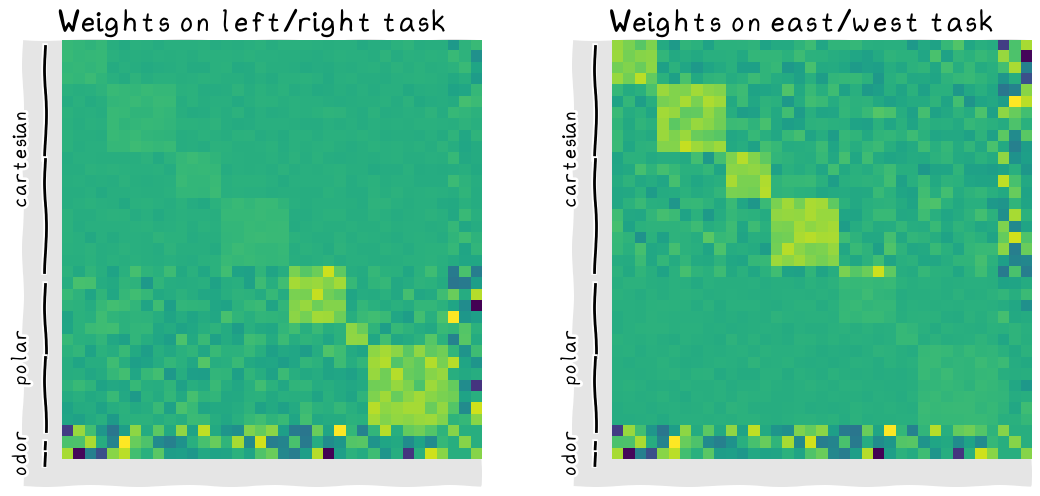

In [25]:
with plt.xkcd():
    neural[0:20, :] = neural[0:20, :] / 5

    fig, ax = plt.subplots(1, 2, figsize=(13, 8))
    ax[0].matshow(neural)
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    # ax.set_xlabel('time')
    # ax.set_xlabel("Neural data", fontsize=30)
    ax[0].set_title("Weights on left/right task")
    neural[0:20, :] = neural[0:20, :] * 5
    neural[21:34, :] = neural[21:34, :] / 5
    ax[1].matshow(neural)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_title("Weights on east/west task")

    for axi in ax:
        for spine in axi.spines.values():
            spine.set_visible(False)

        for idx, brace in enumerate(braces):
            curlyBrace(
                fig=fig,
                ax=axi,
                p1=brace["p1"],
                p2=brace["p2"],
                k_r=0.0,
                bool_auto=False,
                str_text=brace["str_text"],
                color="black",
                lw=2,
                int_line_num=2,
            )
    fig.patch.set_alpha(0)
    fig.patch.set_facecolor("white")

    plt.show()

## Box plot

In [26]:
agents_pop_num = 10
tmp = ["no translation" for _ in range(agents_pop_num)]
tmp.extend(["cartesian\ntranslated" for _ in range(agents_pop_num)])
tmp.extend(["polar\ntranslated" for _ in range(agents_pop_num)])
df_transl = pd.DataFrame(
    {
        "task_solved": np.concatenate(
            [
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
            ]
        ),
        "translated_experiment": tmp,
    }
)
df_transl

,task_solved,translated_experiment
0,0.846386,no translation
1,0.863233,no translation
2,0.895143,no translation
3,0.991352,no translation
4,0.954645,no translation
5,0.847404,no translation
6,0.892291,no translation
7,0.941018,no translation
8,0.935946,no translation
9,0.851639,no translation


In [27]:
tmp = ["left/right\ncorrect\nangle" for _ in range(agents_pop_num)]
tmp.extend(["left/right\nincorrect\nangle" for _ in range(agents_pop_num)])
tmp.extend(["east/west\ncorrect\nangle" for _ in range(agents_pop_num)])
tmp.extend(["east/west\nincorrect\nangle" for _ in range(agents_pop_num)])
df_wrong_angle = pd.DataFrame(
    {
        "task_solved": np.concatenate(
            [
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.8, high=1.0, size=agents_pop_num),
                np.random.uniform(low=0.0, high=0.2, size=agents_pop_num),
            ]
        ),
        "incorrect_angle_experiment": tmp,
    }
)
df_wrong_angle

,task_solved,incorrect_angle_experiment
0,0.916434,left/right\ncorrect\nangle
1,0.906943,left/right\ncorrect\nangle
2,0.986593,left/right\ncorrect\nangle
3,0.875806,left/right\ncorrect\nangle
4,0.953444,left/right\ncorrect\nangle
5,0.912681,left/right\ncorrect\nangle
6,0.884020,left/right\ncorrect\nangle
7,0.898223,left/right\ncorrect\nangle
8,0.854451,left/right\ncorrect\nangle
9,0.891482,left/right\ncorrect\nangle


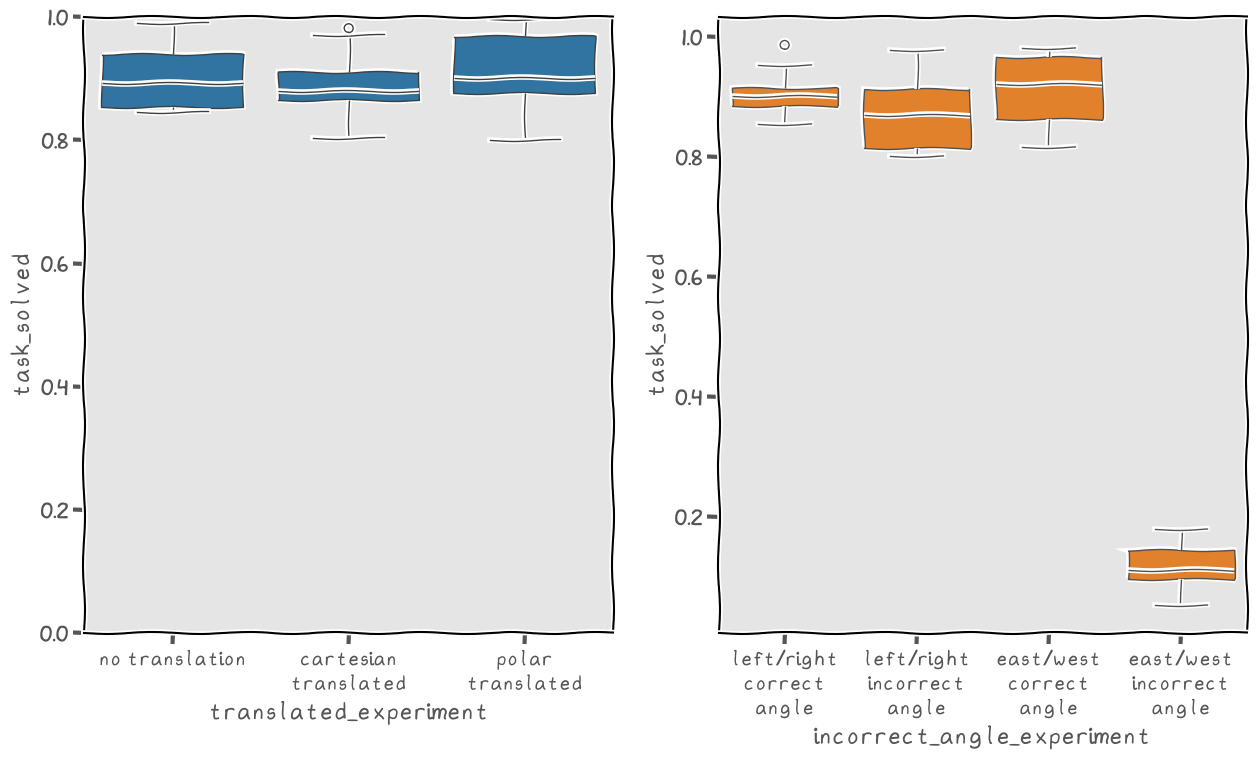

In [41]:
plt.style.use("ggplot")
with plt.xkcd():
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))
    palette = sns.color_palette("tab10")

    sns.boxplot(
        data=df_transl,
        x="translated_experiment",
        y="task_solved",
        ax=ax[0],
        color=palette[0],
    )
    ax[0].set(ylim=(0, 1))

    sns.boxplot(
        data=df_wrong_angle,
        x="incorrect_angle_experiment",
        y="task_solved",
        ax=ax[1],
        color=palette[1],
    )

    fig.patch.set_alpha(0)
    fig.patch.set_facecolor("white")

    plt.show()

## Weights

In [29]:
class Cues(Enum):
    NoOdor = 0
    OdorA = 1
    OdorB = 2


CONTEXTS_LABELS = OrderedDict(
    [
        # (LightCues.North, "Pre odor - North light"),
        # (LightCues.South, "Pre odor - South light"),
        # (OdorID.A, "Post odor - Odor A"),
        # (OdorID.B, "Post odor - Odor B"),
        (Cues.NoOdor, "Pre odor"),
        (Cues.OdorA, "Odor A"),
        (Cues.OdorB, "Odor B"),
    ]
)
rows = 5
cols = 5
tiles_locations = torch.arange(rows * cols, device=device)

In [30]:
# Construct input dictionnary to be fed to the network
input_cond = OrderedDict({})
for cue_obj, cue_txt in CONTEXTS_LABELS.items():
    for loc in tiles_locations:
        current_state = torch.tensor([loc, cue_obj.value], device=device)
        input_cond[f"{loc}-{cue_txt}"] = current_state.float()
input_cond

OrderedDict([('0-Pre odor', tensor([0., 0.])),
             ('1-Pre odor', tensor([1., 0.])),
             ('2-Pre odor', tensor([2., 0.])),
             ('3-Pre odor', tensor([3., 0.])),
             ('4-Pre odor', tensor([4., 0.])),
             ('5-Pre odor', tensor([5., 0.])),
             ('6-Pre odor', tensor([6., 0.])),
             ('7-Pre odor', tensor([7., 0.])),
             ('8-Pre odor', tensor([8., 0.])),
             ('9-Pre odor', tensor([9., 0.])),
             ('10-Pre odor', tensor([10.,  0.])),
             ('11-Pre odor', tensor([11.,  0.])),
             ('12-Pre odor', tensor([12.,  0.])),
             ('13-Pre odor', tensor([13.,  0.])),
             ('14-Pre odor', tensor([14.,  0.])),
             ('15-Pre odor', tensor([15.,  0.])),
             ('16-Pre odor', tensor([16.,  0.])),
             ('17-Pre odor', tensor([17.,  0.])),
             ('18-Pre odor', tensor([18.,  0.])),
             ('19-Pre odor', tensor([19.,  0.])),
             ('20-Pre odor', t

In [31]:
# Get the number of neurons in the layer inspected
neurons_num = 100

# Get the activations from the network
# activations_layer = (
#     torch.ones((len(input_cond), neurons_num), device=DEVICE) * torch.nan
# )
# for idx, (cond, input_val) in enumerate(input_cond.items()):
#     activations_layer[idx, :] = torch.randn((1, neurons_num))
activations_layer = torch.randn((len(input_cond), neurons_num), device=device) / 5

In [32]:
activations_layer = activations_layer + torch.block_diag(
    torch.ones((4, 6)),
    torch.ones((6, 7)),
    torch.ones((4, 10)),
    torch.ones((6, 7)),
    torch.ones((5, 6)),
    torch.ones((2, 3)),
    torch.ones((7, 8)),
    torch.ones((5, 6)),
    torch.ones((10, 12)),
    torch.ones((3, 4)),
    torch.ones((15, 16)),
    torch.ones((5, 6)),
    torch.ones((3, 9)),
)
activations_layer.shape

torch.Size([75, 100])

In [33]:
activations_layer_df = pd.DataFrame(activations_layer.cpu())  # , columns=cols)
activations_layer_df["Input"] = list(input_cond.keys())
activations_layer_df.set_index("Input", inplace=True)
activations_layer_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Input,,,,,,,,,,,,,,,,,,,,,
0-Pre odor,1.068114,1.142300,1.311489,0.560914,1.234761,0.890676,0.069697,0.265336,-0.170191,-0.062177,...,-0.040904,0.122110,-0.064218,0.031168,-0.040457,0.173939,-0.028735,-0.161330,0.355434,-0.354825
1-Pre odor,0.995223,0.834319,1.184301,0.981646,0.924475,0.938352,0.156194,-0.031212,0.250288,0.092178,...,-0.061095,-0.158873,0.178012,-0.146433,0.023020,0.173900,-0.282189,-0.231196,-0.331629,-0.132170
2-Pre odor,1.373037,0.920521,1.075840,0.805163,0.704722,1.225736,0.088695,-0.188724,-0.127825,0.124214,...,0.338643,-0.232161,-0.042160,-0.088694,-0.162269,0.114175,-0.086327,0.167015,-0.105683,-0.053374
3-Pre odor,1.295990,0.570704,1.077864,0.900029,0.972011,0.963141,-0.010302,0.239303,0.118237,-0.309237,...,-0.407782,-0.015103,-0.088090,0.144259,0.107855,0.064434,-0.358841,0.090541,0.006490,-0.104927
4-Pre odor,0.156824,-0.086655,0.099556,-0.202623,-0.507750,-0.031671,1.194296,1.198017,1.069356,1.094296,...,-0.180355,0.231261,-0.103211,0.354096,0.024066,-0.413809,-0.174012,0.080401,-0.076663,0.104047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20-Odor B,-0.188387,0.266492,-0.255653,-0.188861,-0.138344,-0.054106,-0.129163,-0.201616,-0.060912,0.063836,...,0.919070,0.101412,-0.133139,0.150827,-0.460160,-0.188438,-0.166225,0.247722,0.175415,0.046866
21-Odor B,0.189067,0.077923,0.442507,-0.332344,0.058802,0.240915,-0.237816,-0.384667,-0.008022,0.012064,...,0.874598,0.014057,-0.038221,0.227901,0.061079,0.235406,-0.238045,-0.528568,-0.084295,-0.102307
22-Odor B,0.284341,0.165667,0.096040,0.303956,0.428048,-0.098894,-0.324305,0.048798,-0.110390,0.084071,...,0.046123,1.051701,0.999759,1.294602,0.679880,0.910747,1.180194,1.311037,0.852833,0.999764


In [34]:
def plot_activations(activations_layer_df, input_cond, labels, layer_inspected):
    # Create a categorical palette to identify the clusters
    # cluster_palette = sns.color_palette("Pastel2")
    cluster_palette = sns.color_palette("Accent")
    cluster_colors = dict(zip(list(labels.values()), cluster_palette))
    row_colors = [cluster_colors[cond.split("-")[1]] for cond in input_cond.keys()]
    row_colors_serie = pd.Series(row_colors)
    row_colors_serie = row_colors_serie.set_axis(list(input_cond.keys()))

    cmap = "viridis"
    chart = sns.clustermap(activations_layer_df, cmap=cmap, row_colors=row_colors_serie)
    chart.ax_heatmap.set_xlabel(f"Neurons activations in layer {str(layer_inspected)}")

    for label, col_val in cluster_colors.items():
        chart.ax_col_dendrogram.bar(0, 0, color=col_val, label=label, linewidth=0)
    chart.ax_col_dendrogram.legend(loc="center", bbox_to_anchor=(1.1, 0.7))  # , ncol=6)

    chart.fig.patch.set_alpha(0)
    chart.fig.patch.set_facecolor("white")
    plt.show()

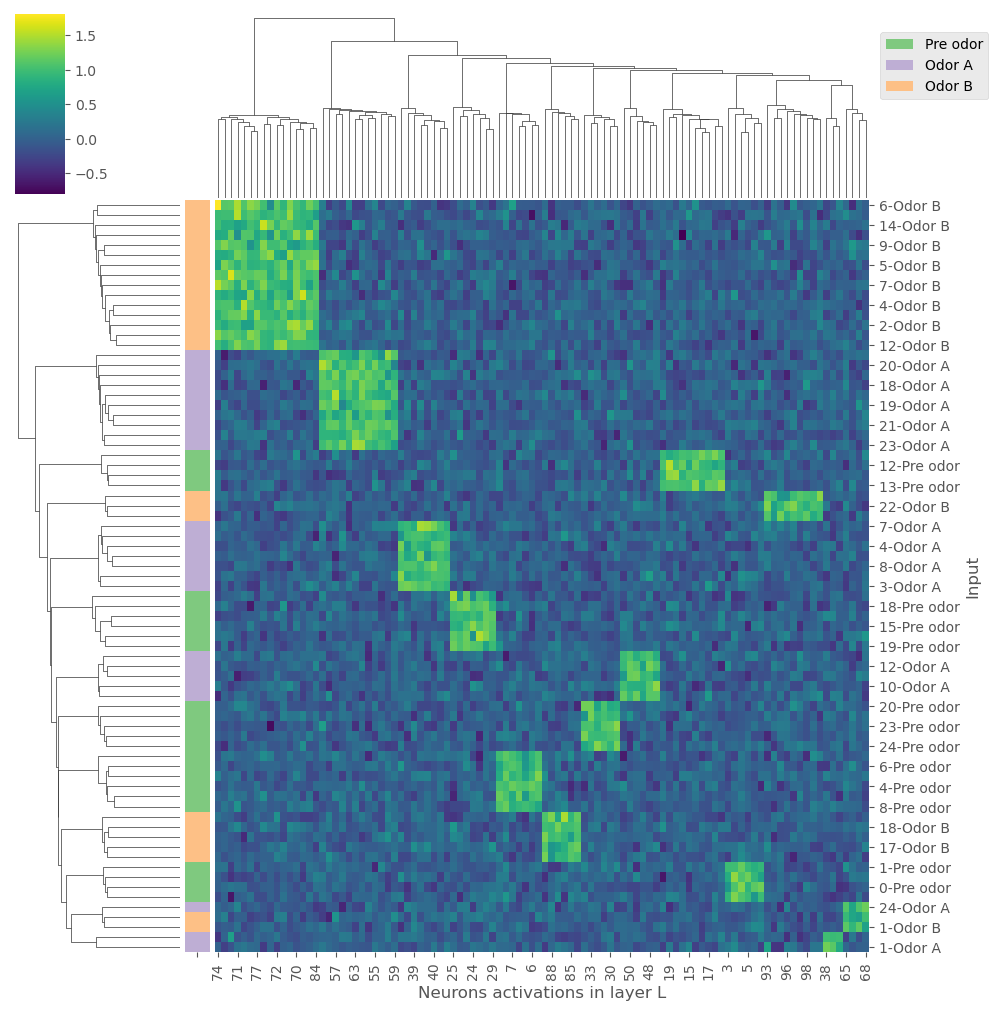

In [35]:
plot_activations(
    activations_layer_df=activations_layer_df,
    input_cond=input_cond,
    labels=CONTEXTS_LABELS,
    layer_inspected="L",
)

## Deviation from correct angle

In [70]:
angle_activations = torch.randn((128, 360), device=device)
angle_activations

tensor([[ 0.4819,  0.7789, -1.2565,  ...,  1.2456, -0.8230, -0.3834],
        [ 0.5116, -1.9891, -0.4865,  ...,  0.1560, -0.3610,  2.2986],
        [-0.2933,  1.1218,  0.3077,  ..., -1.2631,  0.1954,  0.6780],
        ...,
        [ 0.7199, -0.3398,  0.8362,  ...,  1.0244,  0.9328,  1.5952],
        [ 0.0958, -0.5333, -1.1075,  ...,  1.4636, -0.0132,  1.1108],
        [-1.6044,  1.2766,  1.8863,  ..., -2.4381, -1.0632,  0.4998]])

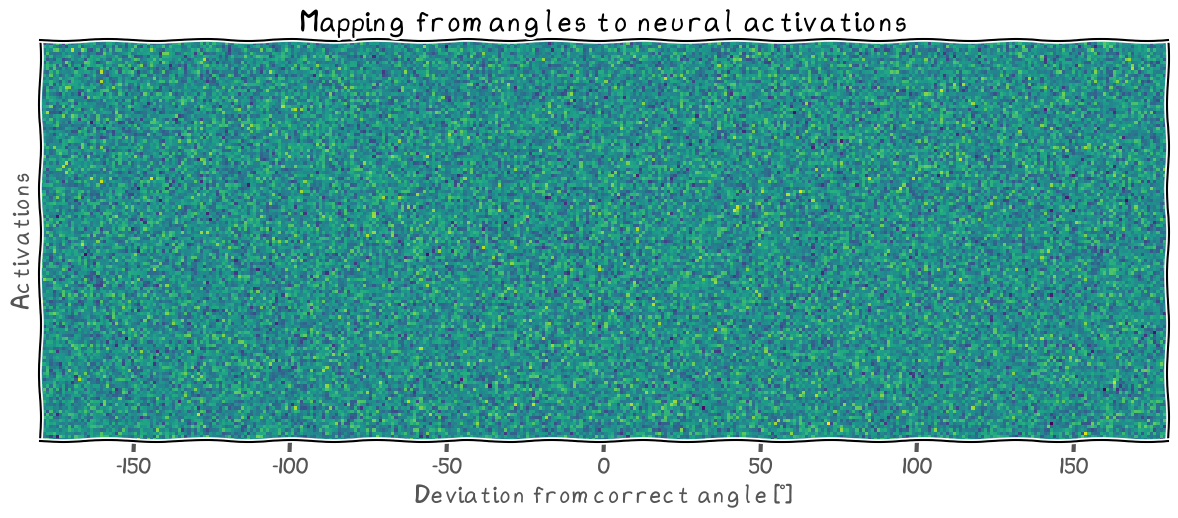

In [102]:
# plt.style.use("ggplot")
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(angle_activations, extent=[-180, 180, 0, 128])
    ax.set_title("Mapping from angles to neural activations")
    ax.set_xlabel("Deviation from correct angle [°]")  # , fontsize=30)
    ax.set_ylabel("Activations")  # , fontsize=30)
    ax.set_yticks([])
    fig.patch.set_alpha(0)
    fig.patch.set_facecolor("white")
    fig.tight_layout()
    plt.show()